#### Tree-Based Methods

##### Tree-based nethods for regression and classification involves stratifying or segmenting the predictor space into a number of simple regions. In order to make a prediction for a given observation, we typically use the mean ot the mode response value for the training observations in the region to which it belongs.
##### Tree-based methods are simple and useful for interpretation. However, they are typically not competitive with the best supervised learning approaches. Generally trees do not have the same level of predictive accuracy as some of the other regression and classification approaches seen before.
##### However, by aggregating many decision trees, using methods like bagging, random forests and boosting, the predictive performance can be substantially improved.
##### An ***ensemble*** method is an approach that combines many simple "building block" models in order to obtain a single and potentially very powerful model. Simple building blocks are sometimes known as ***weak learners***, since they may lead to mediocre predictions on their own. The simple building block is a regression or a classification tree.
##### ***Bagging***- The trees are grown independently on random samples of the observations. Consequently the trees tend to be quite similar to each other. Thus, bagging can get caught in local optima and can fail to thoroughly explore the model space. 
##### ***Random forests***- The trees are once again grown independently on random samples of the observations. However, each split on each tree is performed using a random subset of the features, thereby decorrelating the trees, and leading to a more thorough exploration of model space relative to bagging.
##### ***Boosting***- We only use the original data, and do not draw any random samples. The trees are grown successively, using a "slow" learning approach: each new tree is fit to the signal that is left over from the earlier trees(residual), and shrunken down before it is used.
##### ***Bayesian Additive Regression Trees***- We once again only make use of the original data, and we grow the trees successively. However, each tree is perturbed in order to avoid local minima and achieve a more thorough exploration of the model space. 

In [1]:
!pip install numpy pandas matplotlib statsmodels

In [2]:
! pip install ISLP

In [83]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree, export_text
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestRegressor as RF, GradientBoostingRegressor as GBR, GradientBoostingClassifier as GBC
from ISLP.bart import BART

#### Fitting Classification Trees
##### We first use classification trees to analyze the ***Carseats*** data set. In this data, ***Sales*** is a continuous variable, and so we begin by recording it as a binary variable.

In [4]:
Carseats = load_data("Carseats")
High = np.where(Carseats.Sales > 8, "Yes", "No")

In [5]:
#We now use DecisionTreeClassifier() to fit a classification tree in order to predict Hgh using all variables but Sales
model = MS(Carseats.columns.drop("Sales"), intercept=False)
D = model.fit_transform(Carseats)
feature_names = list(D.columns)
X = np.asarray(D)
clf = DTC(criterion= "entropy", max_depth=3, random_state=0)
clf.fit(X, High)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
accuracy_score(High, clf.predict(X))

#The training error rate is 21%

0.79

In [7]:
# we can access the value of the deviance using log_loss() . Deviance=−2m=1∑n​k=1∑K​ymk​log(p^​mk​)
#where nmk is the number of observations in the mth terminal node that belong to the kth class
resid_dev = np.sum(log_loss(High, clf.predict_proba(X)))
resid_dev

# a small deviance indicates a tree that provides a good fit to the training data.
                   

0.4710647062649358

[Text(0.5, 0.875, 'ShelveLoc[Good] <= 0.5\nentropy = 0.977\nsamples = 400\nvalue = [236, 164]'),
 Text(0.25, 0.625, 'Price <= 92.5\nentropy = 0.894\nsamples = 315\nvalue = [217, 98]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Income <= 57.0\nentropy = 0.887\nsamples = 46\nvalue = [14, 32]'),
 Text(0.0625, 0.125, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.711\nsamples = 36\nvalue = [7, 29]'),
 Text(0.375, 0.375, 'Advertising <= 13.5\nentropy = 0.804\nsamples = 269\nvalue = [203, 66]'),
 Text(0.3125, 0.125, 'entropy = 0.687\nsamples = 224\nvalue = [183, 41]'),
 Text(0.4375, 0.125, 'entropy = 0.991\nsamples = 45\nvalue = [20, 25]'),
 Text(0.75, 0.625, 'Price <= 135.0\nentropy = 0.767\nsamples = 85\nvalue = [19, 66]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'US[Yes] <= 0.5\nentropy = 0.523\nsamples = 68\nvalue = [8, 60]'),
 Text(0.5625, 0.125, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11]'),
 Text(0.6875, 0.125, 'entropy = 0.

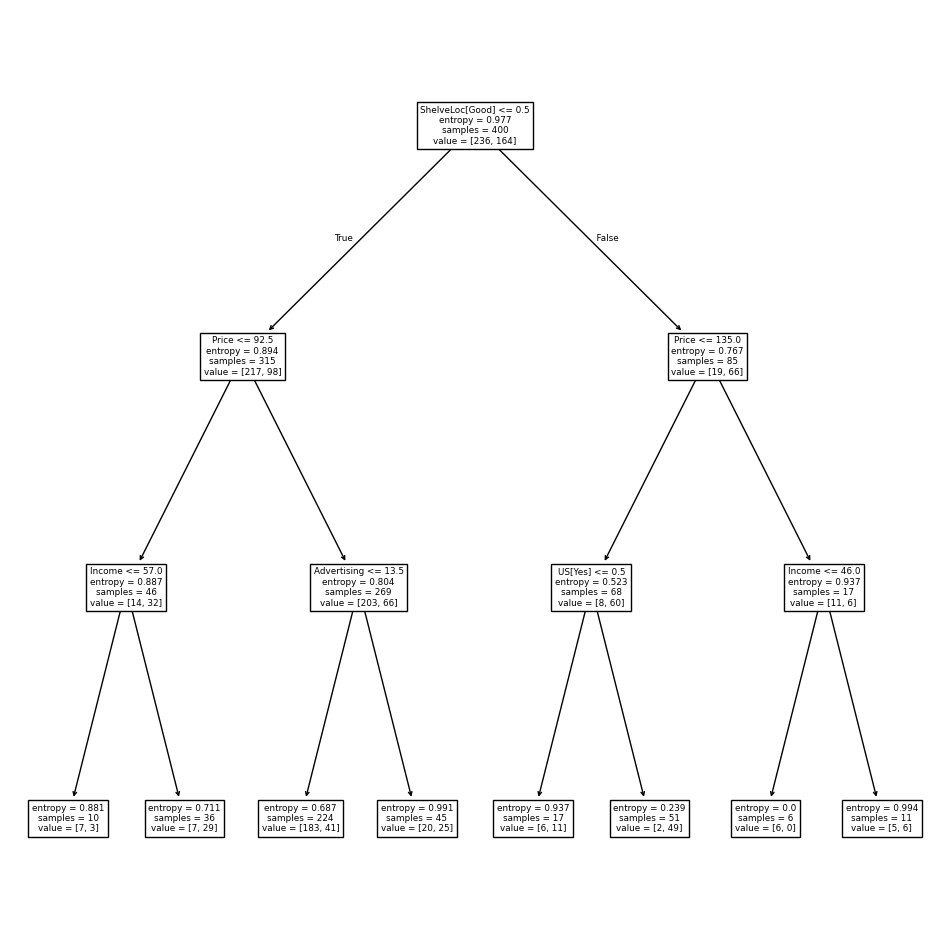

In [8]:
#One of the most attractive properties of trees is that they can be graphically displayed
ax = subplots(figsize=(12,12))[1]
plot_tree(clf, feature_names = feature_names, ax=ax)

##### The most important indicator of ***Sales*** appears to be ***ShelveLoc***.
##### We can see a text representation of the tree using export_text(), which displays the split criterion for each branch. For leaf nodes it shows the overall prediction. We can also see the number of observations in that leaf that take on values of Yes and No by specifying ***show_weight=True***.

In [9]:
export_text(clf, feature_names=feature_names, show_weights=True)

'|--- ShelveLoc[Good] <= 0.50\n|   |--- Price <= 92.50\n|   |   |--- Income <= 57.00\n|   |   |   |--- weights: [7.00, 3.00] class: No\n|   |   |--- Income >  57.00\n|   |   |   |--- weights: [7.00, 29.00] class: Yes\n|   |--- Price >  92.50\n|   |   |--- Advertising <= 13.50\n|   |   |   |--- weights: [183.00, 41.00] class: No\n|   |   |--- Advertising >  13.50\n|   |   |   |--- weights: [20.00, 25.00] class: Yes\n|--- ShelveLoc[Good] >  0.50\n|   |--- Price <= 135.00\n|   |   |--- US[Yes] <= 0.50\n|   |   |   |--- weights: [6.00, 11.00] class: Yes\n|   |   |--- US[Yes] >  0.50\n|   |   |   |--- weights: [2.00, 49.00] class: Yes\n|   |--- Price >  135.00\n|   |   |--- Income <= 46.00\n|   |   |   |--- weights: [6.00, 0.00] class: No\n|   |   |--- Income >  46.00\n|   |   |   |--- weights: [5.00, 6.00] class: Yes\n'

##### In order to properly evaluate the performance of a classification tree on these data, we must estimate the test error rather than simply computing the training error. We split the observations into a training and a test set, build a tree using the training set, and evaluate its performance on the test data.

In [10]:
validation = skm.ShuffleSplit(n_splits=1, test_size=200, random_state=0)
results = skm.cross_validate(clf, D, High, cv=validation)
results["test_score"]

array([0.685])

##### Next we consider whether pruning the tree might lead to improved classification performance. We first split the data into a training and test set. We will use cross-validation to prune the tree on the training set, and then evaluate the performance of the pruned tree on the test set.

In [11]:
X_train, X_test, High_train, High_test= skm.train_test_split(X, High, test_size=0.5, random_state=0)

#we first refit the full tree on the training set; here we do not set a max_depth parameter, since we will learn that through cross-validation
clf = DTC(criterion="entropy", random_state=0)
clf.fit(X_train, High_train)
accuracy_score(High_test, clf.predict(X_test))

0.735

In [12]:
# Next we use the cost_complexity_pruning_path() method of clf to extract cost-complexity values
ccp_path= clf.cost_complexity_pruning_path(X_train, High_train)
kfold = skm.KFold(10, random_state=1, shuffle=True)
#The above yields a set of impurities and alpha values from which we can extract an optimal one by cross-validation
grid = skm.GridSearchCV(clf, {"ccp_alpha": ccp_path.ccp_alphas}, refit=True, cv=kfold, scoring="accuracy")
grid.fit(X_train, High_train)
grid.best_score_

0.685

[Text(0.4345703125, 0.95, 'Price <= 94.5\nentropy = 0.977\nsamples = 200\nvalue = [118, 82]'),
 Text(0.1875, 0.85, 'CompPrice <= 118.5\nentropy = 0.769\nsamples = 40\nvalue = [9, 31]'),
 Text(0.31103515625, 0.8999999999999999, 'True  '),
 Text(0.15625, 0.75, 'Price <= 86.5\nentropy = 0.894\nsamples = 29\nvalue = [9, 20]'),
 Text(0.09375, 0.65, 'Income <= 60.0\nentropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(0.0625, 0.55, 'Advertising <= 5.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.03125, 0.45, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.09375, 0.45, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.125, 0.55, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.21875, 0.65, 'Population <= 212.5\nentropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(0.1875, 0.55, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.25, 0.55, 'Income <= 36.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.21875, 0.45, 'entropy = 0.0\nsamples = 3\nval

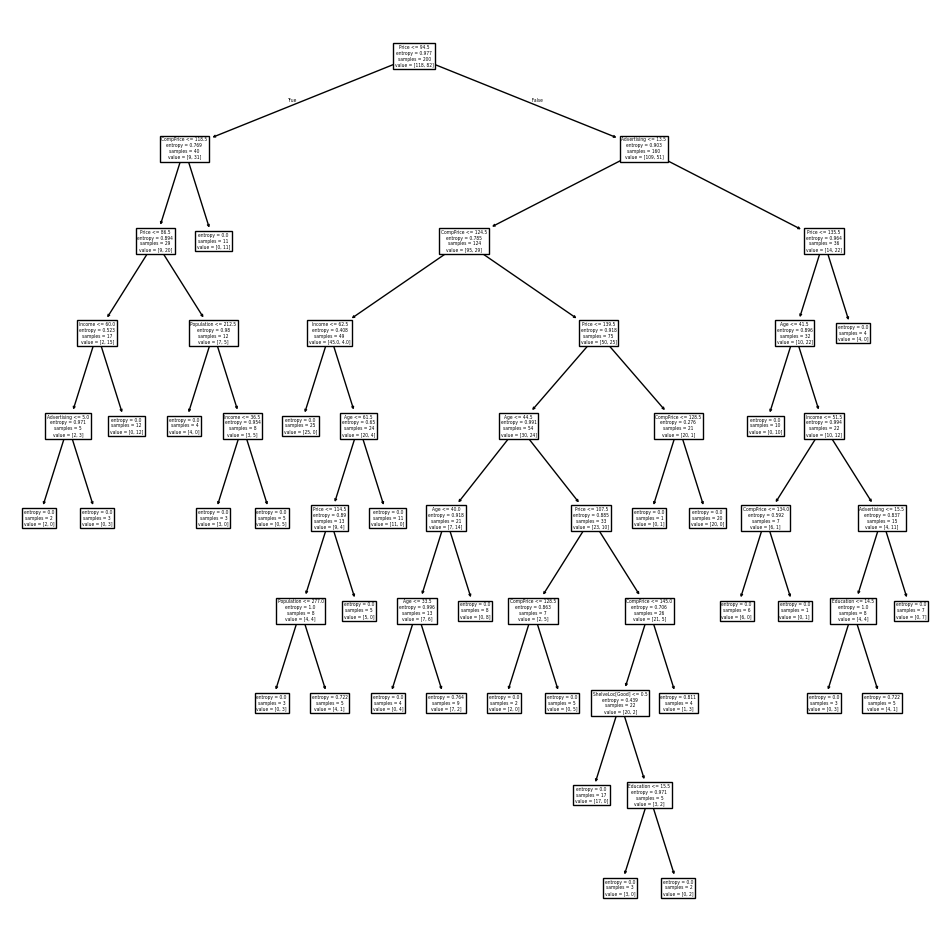

In [13]:
#Lets plot the pruned tree
ax = subplots(figsize=(12,12))[1]
best_ = grid.best_estimator_
plot_tree(best_, feature_names = feature_names, ax=ax)

In [14]:
#The tree above is quite bushy. We could count the leaves or query best_ instead
best_.tree_.n_leaves

#The tree with 30 terminal nodes results in the lowest cross-validation error rate with an accuracy of 68.5%

30

##### How well does this pruned tree perform on the test data set? once again we apply the predict() function.

In [15]:
accuracy_score(High_test, best_.predict(X_test))

#Now 72% of the test observations are correctly classified, which is slightly worse than the error for the full tree(with 35 leaves)
#So cross-validation has not helped us much here; it only pruned off 5 leaves, at a cost of a slightly worse error

0.72

In [16]:
confusion = confusion_table(best_.predict(X_test), High_test)
confusion

Truth,No,Yes
Predicted,,
No,94,32
Yes,24,50


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(best_.predict(X_test), High_test)

array([[94, 32],
       [24, 50]], dtype=int64)

#### Fitting Regression Trees
##### Here we fit a regression tree to the ***Boston*** data set. The steps are similar to those for classification trees.

[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text

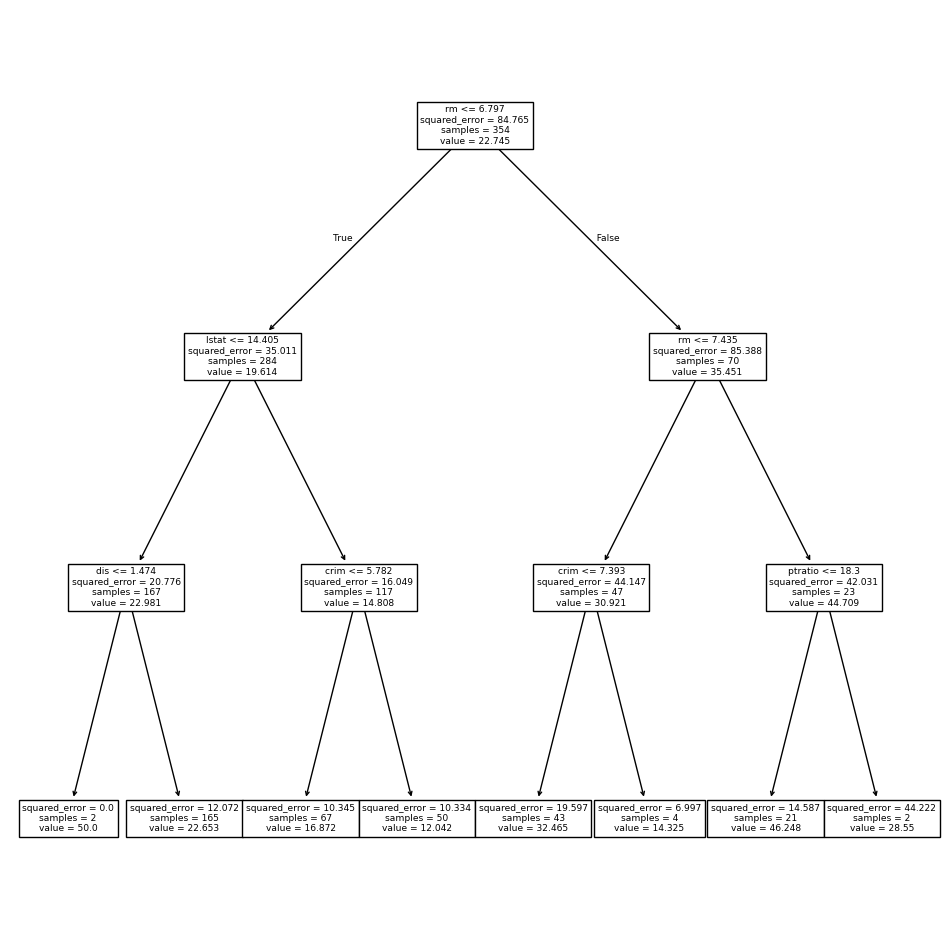

In [18]:
Boston = load_data("Boston")
model=MS(Boston.columns.drop("medv"), intercept=False)
D= model.fit_transform(Boston)
feature_names= list(D.columns)
X= np.asarray(D)
#first we split the data into training and test sets, and fit the tree to the training data. we use 30% of the data for the test set
X_train, X_test, y_train, y_test = skm.train_test_split(X, Boston["medv"], test_size=0.3, random_state=0)

#we fit the regression tree
reg= DTR(max_depth=3)
reg.fit(X_train, y_train)
ax= subplots(figsize=(12,12))[1]
plot_tree(reg, feature_names= feature_names, ax=ax)

#Interpretation:
# The variable lstat measures the percentage of individuals with lower socioeconomic status. The tree indicates that lower values of lstat correspond to more expensive houses.
#The tree predicts a median house price of $12,042 for small-sized homes(rm < 6.8), in surburbs in which the residents have low socioeconomic status(lstat > 14.4) and crime rate is moderate(crim > 5.8)

In [19]:
#Now we use the cross-validation function to see whether pruning the tree will improve performance
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold= skm.KFold(5, shuffle=True, random_state=10)
grid= skm.GridSearchCV(reg, {"ccp_alpha":ccp_path.ccp_alphas}, refit=True, cv=kfold, scoring="neg_mean_squared_error")
G = grid.fit(X_train, y_train)
#use the pruned tree to make predictions on the test set
best_ = G.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)

#The test set MSE associated with the regression tree is 28.07. The square root of the MSE is around 5.30, indicating that this model leads to test predictions that are within around $5300 of the true median home value for the surburb.

28.06985754975404

[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text

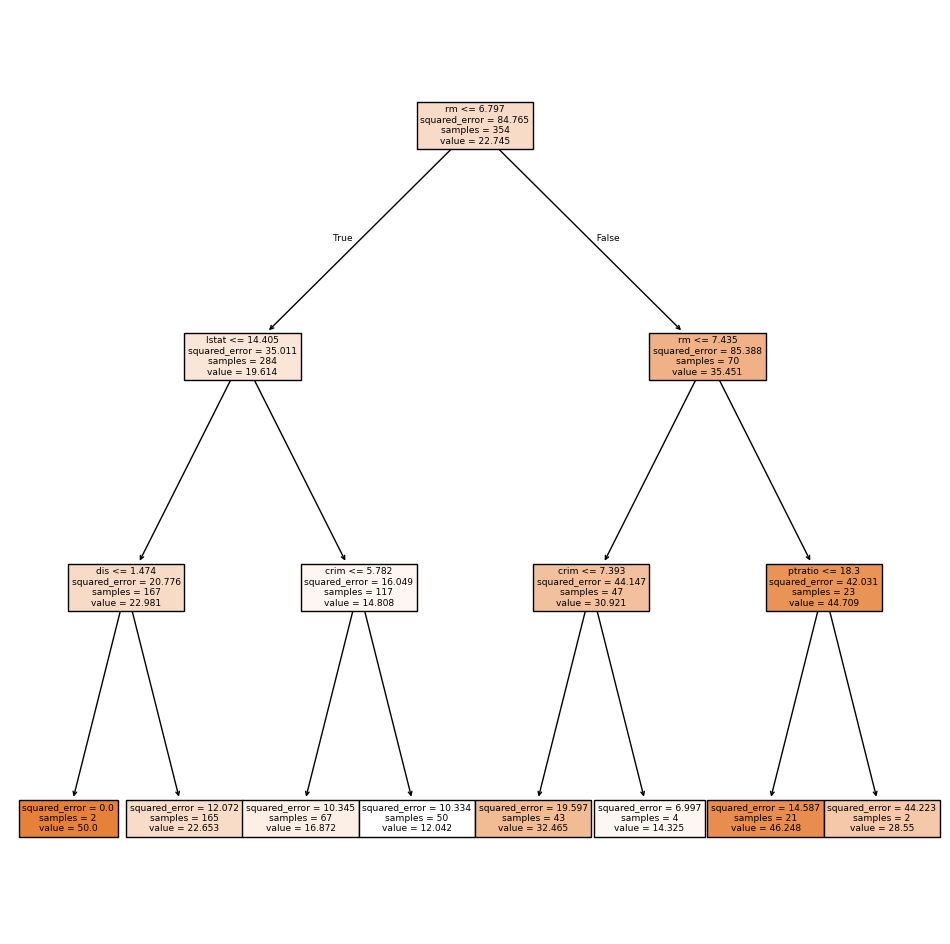

In [20]:
#Lets plot the best tree
ax = subplots(figsize=(12,12))[1]
plot_tree(best_, feature_names=feature_names, ax=ax, filled=True)

#### Bagging(m=p) and Random Forests(m=√p)

##### Bagging is simply a special case of a random forest with m=p. Therefore the ***RandomForestRegressor()*** function can be used to perform both bagging and random forests.

In [21]:
# We  start with bagging
bag_boston = RF(max_features=X_train.shape[1], random_state=0)
bag_boston.fit(X_train, y_train)
#max_features indicates that all 12 predictors be should be considered for each split of the tree

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,12
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


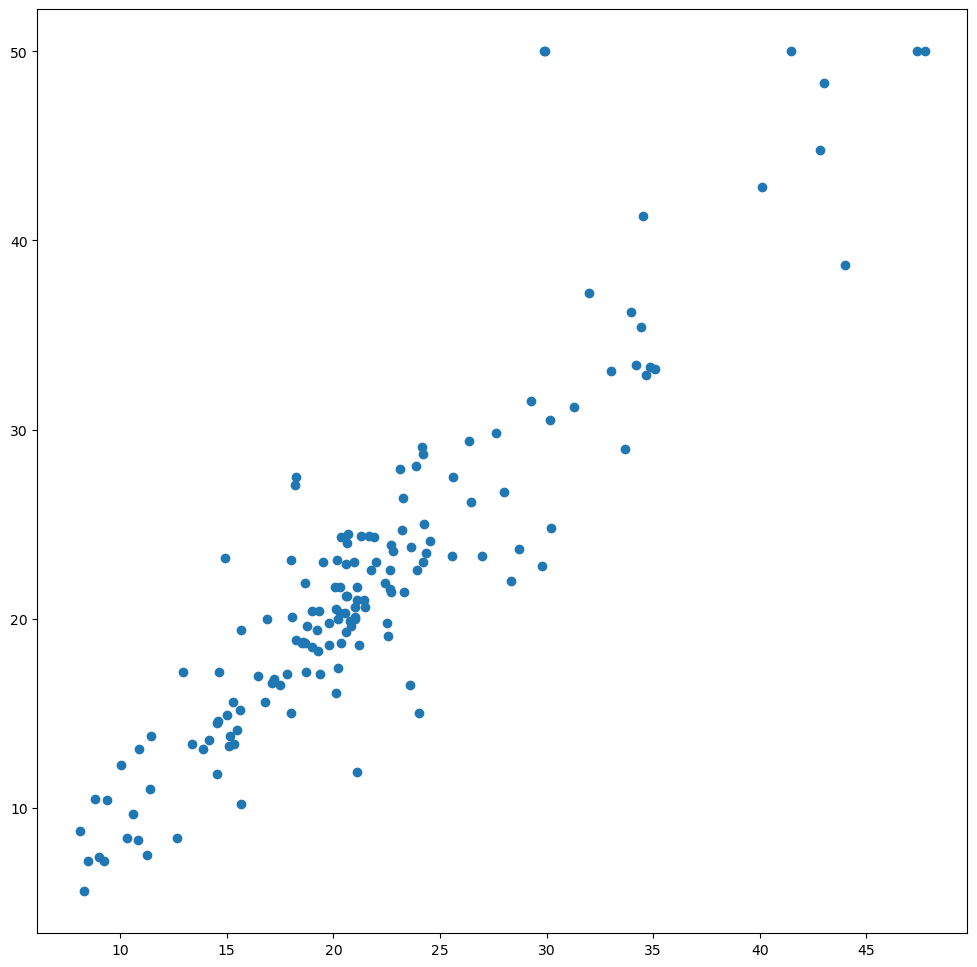

In [22]:
#lets plot
ax= subplots(figsize=(12,12))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag, y_test)

In [23]:
# bagged model's performance on the test set
np.mean((y_test - y_hat_bag)**2)

14.634700151315787

##### The test set MSE associated with the bagged regression tree is 14.63, about half that obtained using an optimally-pruned single tree.
##### We could change the number of trees grown from the default of 100 using the ***n_estimators*** argument.

In [24]:
bag_boston = RF(max_features= X_train.shape[1],
               n_estimators=500,
               random_state=0).fit(X_train, y_train)
y_hat_bag= bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

# NB: There is not much change. Bagging and random forests cannot overfit by increasing the numnber of trees, but can underfit if the number is too small.

14.605662565263161

#### Random Forests

In [25]:
#Random forest (m=√p variables)
RF_boston = RF(max_features=6, random_state=0).fit(X_train, y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test - y_hat_RF)**2)

20.04276446710527

In [26]:
#The test set MSE is 20.04; this indicates that random forests did somewhat worse than bagging in this case.
# Extracting the feature_importances_ values from the fitted model, we can view the importance of each variable.
feature_imp = pd.DataFrame({"importance": RF_boston.feature_importances_}, index=feature_names)
feature_imp.sort_values(by="importance", ascending=False)

#This is a relative measure of the total decrease in node impurity that results from splits over that variable, averaged over all trees
#The results indicate that across all of the trees considered in the random forest, the wealth level of the community(lstat) and  the house size(rm) are by far the two most important variables.

,importance
lstat,0.356203
rm,0.332163
ptratio,0.067270
crim,0.055404
indus,0.053851
dis,0.041582
nox,0.035225
tax,0.025355
age,0.021506
rad,0.004784


#### Boosting

##### Boosting has three tuning parameters;
##### 1. The number of trees ***B***. Unlike bagging and random forests, boosting can overfit if B is too large. We use cross-validation to select B.
##### 2. The shrinkage parameter ***λ***, a small positive number. This controls the rate at which boosting learns.Typical values are 0.01 or 0.001, and the right choice can depend on the problem. Very small ***λ*** can require using a very large value of B in order to achieve good performance.
##### 3. The number of ***d*** splits in each tree, which controls the complexity of the boosted ensemble.

In [27]:
boost_boston = GBR(n_estimators=5000,
                  learning_rate=0.001,
                  max_depth=3,
                  random_state=0)
boost_boston.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.001
,n_estimators,5000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


##### We can see how the training error  decreases with the ***train_score_*** attribute. 
##### To get an idea of how the test error decreases we can use the ***staged_predict()*** method to get the predicted value along the path.

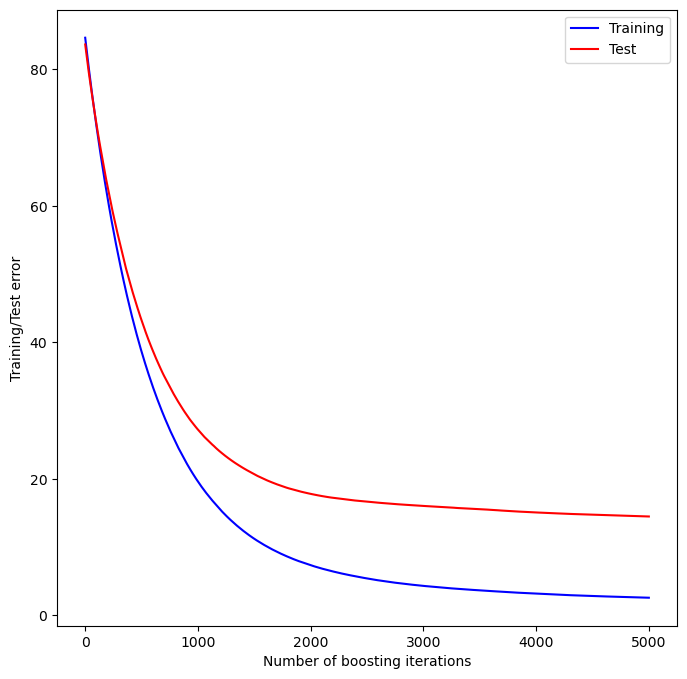

In [28]:
test_error = np.zeros_like(boost_boston.train_score_)
for idx, y_ in enumerate(boost_boston.staged_predict(X_test)):
    test_error[idx]= np.mean((y_test - y_)**2)
plot_idx = np.arange(boost_boston.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.set_xlabel("Number of boosting iterations", fontsize=10)
ax.set_ylabel("Training/Test error", fontsize=10)
ax.plot(plot_idx, boost_boston.train_score_, "b", label="Training")
ax.plot(plot_idx, test_error, "r", label="Test")
ax.legend()

In [29]:
test_error

array([83.63320204, 83.49995557, 83.36699764, ..., 14.4826231 ,
       14.48212645, 14.48140592])

In [30]:
#We now use the boosted model to predict medv on the test set
y_hat_boost = boost_boston.predict(X_test)
np.mean((y_test - y_hat_boost)**2)

14.481405918831591

##### The test MSE obtained is 14.48, similar to the test MSE for bagging. If we want to, we can perform boosting with a different value of the shrinkage parameter. The default is 0.001, but this is easily modified.

In [31]:
boost_boston = GBR(n_estimators=5000,
                  learning_rate=0.2,
                  max_depth=3,
                  random_state=0)
boost_boston.fit(X_train, y_train)
y_hat_boost= boost_boston.predict(X_test)
np.mean((y_test - y_hat_boost)**2)

14.501514553719565

#### Bayesian Additive Regression Trees

##### In this section we demo a Python implementation of BART found in the ISLP.bart package. We fit a model to the ***Boston*** housing data set. This ***BART()*** estimator is designed for quantitative outcome variables, though other implementations are available for fitting logistic and probit models to categorical data.

In [32]:
bart_boston = BART(random_state=0, burnin=5, ndraw=15)
bart_boston.fit(X_train, y_train)
yhat_test = bart_boston.predict(X_test.astype(np.float32))
np.mean((y_test - yhat_test)**2)

22.145009458109232

##### We can check how many times each variable appeared in the collection of trees. This gives a summary similar to the variable importance plot for boosting and random forests.

In [33]:
var_inclusion = pd.Series(bart_boston.variable_inclusion_.mean(0), index= D.columns)
var_inclusion

crim       26.933333
zn         27.866667
indus      26.466667
chas       22.466667
nox        26.600000
rm         29.800000
age        22.733333
dis        26.466667
rad        23.666667
tax        24.133333
ptratio    24.266667
lstat      31.000000
dtype: float64

#### Question 1

##### This problem involves the ***OJ*** data set which is part of the ISLP package.
##### ***(a)*** Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [34]:
OJ = load_data("OJ")
model= MS(OJ.columns.drop("Purchase"), intercept=False)
D= model.fit_transform(OJ)
y=OJ["Purchase"]
X= np.asarray(D)
feature_names=list(D.columns)
X_train, X_test, y_train, y_test=skm.train_test_split(X, y, test_size=0.25, random_state=0)

##### ***(b)*** Fit a tree to the training data, with ***Purchase*** as the response and the other variables as predictors. What is the training error rate?

In [35]:
#fit a classification tree because the Purchase is categorical
clf = DTC(random_state=0)
clf.fit(X_train, y_train)

#training error rate
y_train_pred= clf.predict(X_train)
training_err_rate = 1 - accuracy_score(y_train, y_train_pred)
training_err_rate

0.00872817955112215

In [36]:
#Train/test split
#train_data= OJ.sample(n=800, random_state=0)
#test_data= OJ.drop(train_data.index)
#X_train= train_data.drop("Purchase", axis=1)
#y_train = train_data["Purchase"]
#X_test = test_data.drop("Purchase", axis=1)
#y_test = test_data["Purchase"]
#convert categorical predictors to numeric using one-hot encoding
#X_train_enc = pd.get_dummies(X_train, drop_first=True)
#X_test_enc = pd.get_dummies(X_test, drop_first=True)
#clf= DTC(random_state=0)
#clf.fit(X_train_enc, y_train)
#y_train_pred= clf.predict(X_train_enc)
#train_err_rate= 1 - accuracy_score(y_train, y_train_pred)
#train_err_rate

##### ***(c)*** Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?

[Text(0.5269294507575758, 0.9736842105263158, 'LoyalCH <= 0.509\ngini = 0.469\nsamples = 802\nvalue = [501, 301]\nclass = CH'),
 Text(0.23851799242424243, 0.9210526315789473, 'LoyalCH <= 0.282\ngini = 0.415\nsamples = 341\nvalue = [100, 241]\nclass = MM'),
 Text(0.3827237215909091, 0.9473684210526316, 'True  '),
 Text(0.08759469696969698, 0.868421052631579, 'LoyalCH <= 0.062\ngini = 0.237\nsamples = 160\nvalue = [22, 138]\nclass = MM'),
 Text(0.030303030303030304, 0.8157894736842105, 'StoreID <= 1.5\ngini = 0.064\nsamples = 60\nvalue = [2, 58]\nclass = MM'),
 Text(0.015151515151515152, 0.7631578947368421, 'ListPriceDiff <= 0.15\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = MM'),
 Text(0.007575757575757576, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = CH'),
 Text(0.022727272727272728, 0.7105263157894737, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = MM'),
 Text(0.045454545454545456, 0.7631578947368421, 'WeekofPurchase <= 268.5\ngini = 0.034\nsamples = 

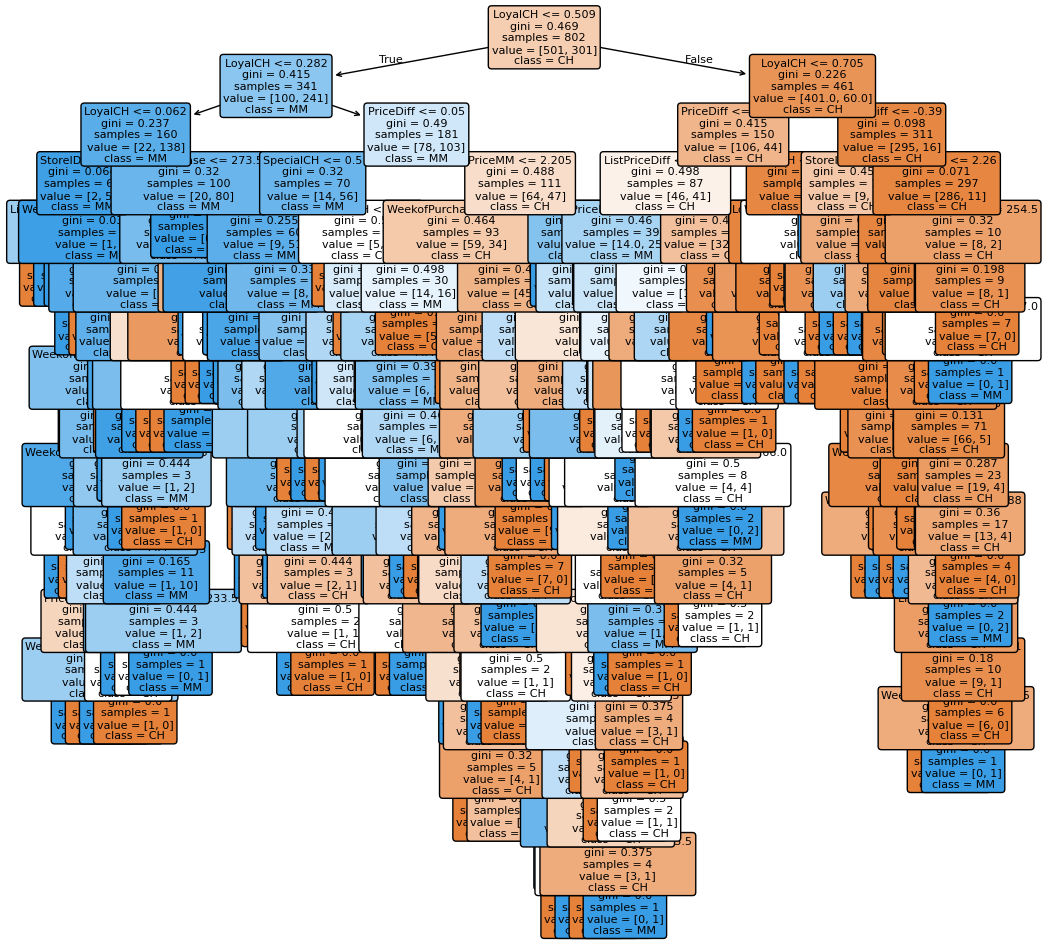

In [37]:
ax= subplots(figsize=(12,12))[1]
plot_tree(clf, feature_names=feature_names, ax=ax, filled=True, rounded=True, fontsize=8, class_names=clf.classes_)

In [38]:
clf.get_n_leaves
clf.tree_.n_leaves

#The unpruned tree has 167 terminal nodes, which indicates a very complex model.
#The tree strongly relies on LoyalCH as the main predictor of purchase choice.
#While training error is near zero, the tree is likely overfitting the data, so pruning or setting a maximum depth would be needed for a more interpretable and generalizable data.

167

##### ***(d)*** Use the ***export_tree()*** function to produce a text summary of the fitted tree. Pick one of the terminal nodes, and interpret the information displayed.

In [39]:
export_text(clf, feature_names=feature_names)

'|--- LoyalCH <= 0.51\n|   |--- LoyalCH <= 0.28\n|   |   |--- LoyalCH <= 0.06\n|   |   |   |--- StoreID <= 1.50\n|   |   |   |   |--- ListPriceDiff <= 0.15\n|   |   |   |   |   |--- class: CH\n|   |   |   |   |--- ListPriceDiff >  0.15\n|   |   |   |   |   |--- class: MM\n|   |   |   |--- StoreID >  1.50\n|   |   |   |   |--- WeekofPurchase <= 268.50\n|   |   |   |   |   |--- class: MM\n|   |   |   |   |--- WeekofPurchase >  268.50\n|   |   |   |   |   |--- LoyalCH <= 0.00\n|   |   |   |   |   |   |--- class: MM\n|   |   |   |   |   |--- LoyalCH >  0.00\n|   |   |   |   |   |   |--- class: CH\n|   |   |--- LoyalCH >  0.06\n|   |   |   |--- WeekofPurchase <= 273.50\n|   |   |   |   |--- SalePriceCH <= 1.94\n|   |   |   |   |   |--- WeekofPurchase <= 263.50\n|   |   |   |   |   |   |--- STORE <= 1.50\n|   |   |   |   |   |   |   |--- WeekofPurchase <= 228.00\n|   |   |   |   |   |   |   |   |--- class: CH\n|   |   |   |   |   |   |   |--- WeekofPurchase >  228.00\n|   |   |   |   |   |  

##### ***(e)*** Predict the response on the test data, and produce a confusion table matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [40]:
y_pred = clf.predict(X_test)
test_error=1 - accuracy_score(y_test, y_pred)
test_error

0.26865671641791045

In [41]:
confusion_table(y_test, y_pred)

Truth,CH,MM
Predicted,,
CH,115,37
MM,35,81


##### ***(f)*** Use cross-validation on the training set in order to determine the optimal tree size.

In [42]:
ccp_path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities= ccp_path.ccp_alphas, ccp_path.impurities
kfold= skm.KFold(10, shuffle=True, random_state=0)
grid = skm.GridSearchCV(clf, {"ccp_alpha": ccp_path.ccp_alphas}, refit=True, cv=kfold, scoring="accuracy")
grid.fit(X_train, y_train)
best_estimator=grid.best_estimator_
tree_depth, n_leaves= (best_estimator.get_depth(), best_estimator.get_n_leaves())
(tree_depth, n_leaves)

(5, 8)

##### ***(g)*** Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

In [43]:
y_pred= best_estimator.predict(X_test)
test_error= 1 - accuracy_score(y_test, y_pred)
test_error

0.20149253731343286

In [44]:
cv_results= grid.cv_results_
errors = 1 - cv_results["mean_test_score"]
errors
tree_sizes = []
# Create a decision tree for each alpha value and get its number of leaves
for alpha in ccp_path.ccp_alphas:
    # Create a decision tree with the current alpha value
    tree = DTC(ccp_alpha=alpha)
    tree.fit(X_train, y_train)  
    # Append the number of leaves (get_n_leaves is a property, not a method)
    tree_sizes.append(tree.get_n_leaves())

#tree_sizes

Text(0.5, 1.0, 'Tree size vs. CV Error (OJ data)')

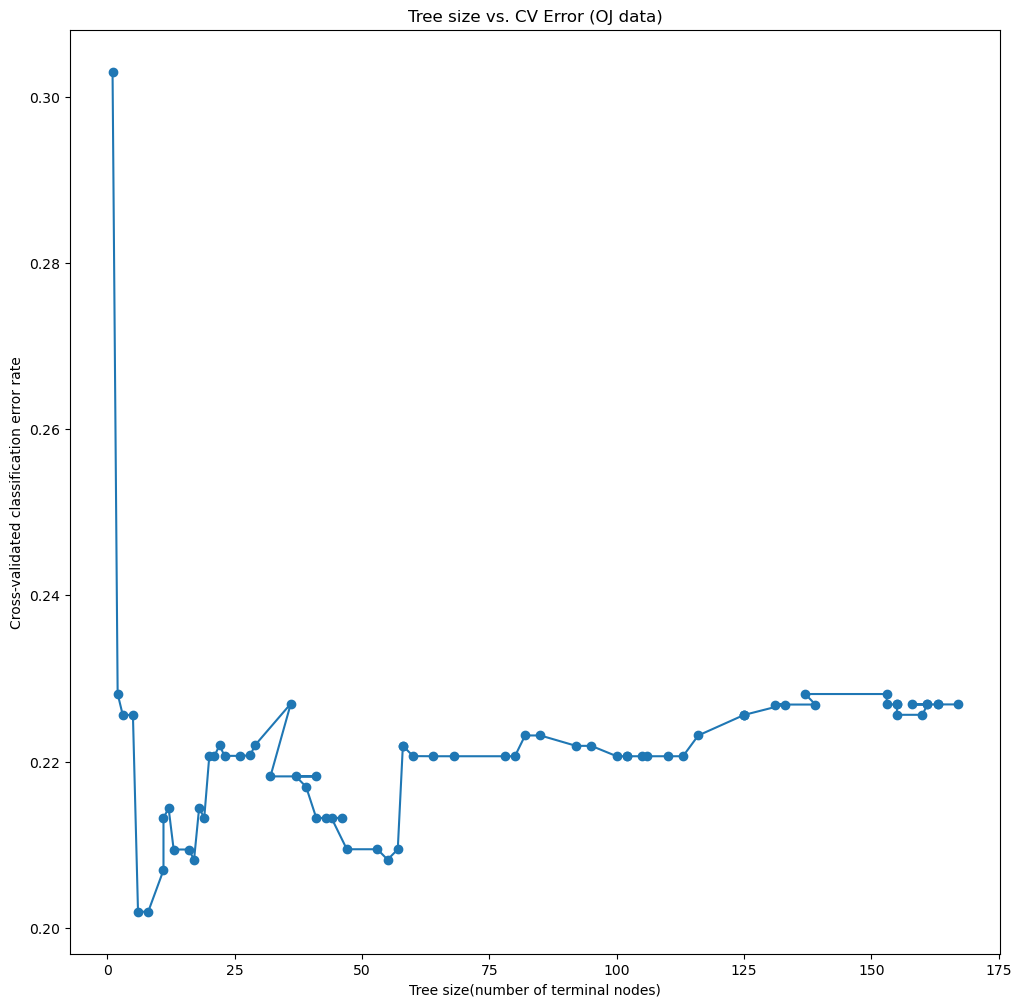

In [45]:
fig, ax = subplots(figsize=(12,12))
ax.plot(tree_sizes, errors, marker="o")
ax.set_xlabel("Tree size(number of terminal nodes)")
ax.set_ylabel("Cross-validated classification error rate")
ax.set_title("Tree size vs. CV Error (OJ data)")


##### ***(h)*** Which tree size corresponds to the lowest cross-validated classification error rate on the y-axis.

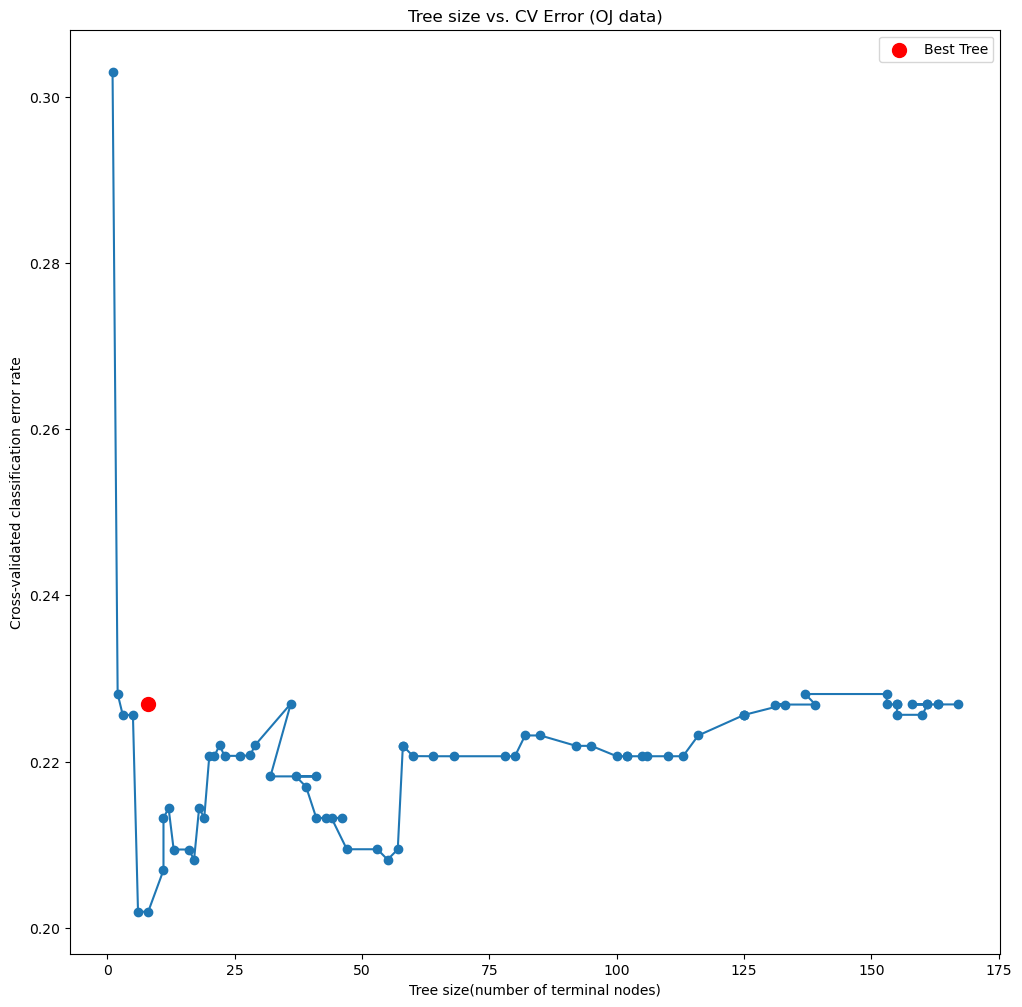

In [46]:
lowest = tree_sizes[np.argmin(errors)]
#lowest
ax.scatter(lowest, errors[lowest], color="red", s=100, label="Best Tree")
ax.legend()
fig

##### ***(i)*** Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

[Text(0.5, 0.9166666666666666, 'LoyalCH <= 0.509\ngini = 0.469\nsamples = 802\nvalue = [501, 301]\nclass = CH'),
 Text(0.2, 0.75, 'LoyalCH <= 0.282\ngini = 0.415\nsamples = 341\nvalue = [100, 241]\nclass = MM'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'gini = 0.237\nsamples = 160\nvalue = [22, 138]\nclass = MM'),
 Text(0.3, 0.5833333333333334, 'PriceDiff <= 0.05\ngini = 0.49\nsamples = 181\nvalue = [78, 103]\nclass = MM'),
 Text(0.2, 0.4166666666666667, 'gini = 0.32\nsamples = 70\nvalue = [14, 56]\nclass = MM'),
 Text(0.4, 0.4166666666666667, 'gini = 0.488\nsamples = 111\nvalue = [64, 47]\nclass = CH'),
 Text(0.8, 0.75, 'LoyalCH <= 0.705\ngini = 0.226\nsamples = 461\nvalue = [401.0, 60.0]\nclass = CH'),
 Text(0.65, 0.8333333333333333, '  False'),
 Text(0.7, 0.5833333333333334, 'PriceDiff <= 0.265\ngini = 0.415\nsamples = 150\nvalue = [106, 44]\nclass = CH'),
 Text(0.6, 0.4166666666666667, 'ListPriceDiff <= 0.155\ngini = 0.498\nsamples = 87\nvalue = [46

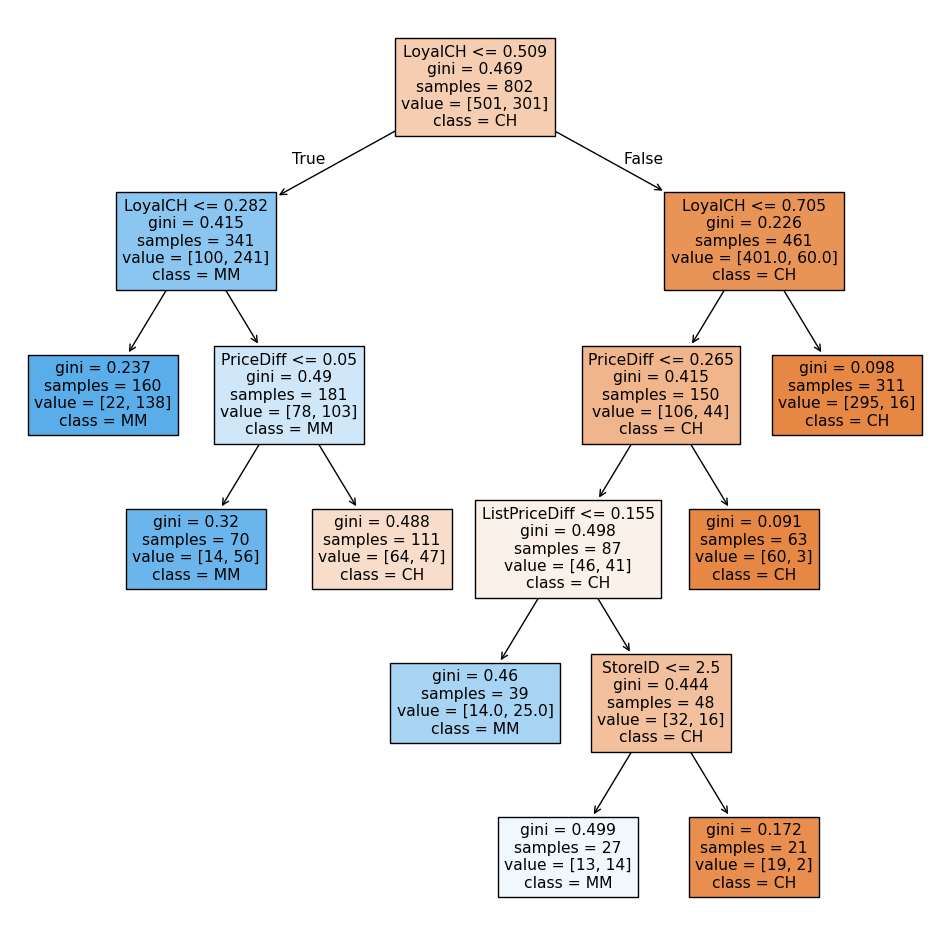

In [47]:
pruned_tree = best_estimator
ax= subplots(figsize=(12,12))[1]
plot_tree(pruned_tree, feature_names=feature_names, class_names=pruned_tree.classes_, filled=True)

[Text(0.5, 0.875, 'LoyalCH <= 0.509\ngini = 0.469\nsamples = 802\nvalue = [501, 301]\nclass = CH'),
 Text(0.25, 0.625, 'LoyalCH <= 0.282\ngini = 0.415\nsamples = 341\nvalue = [100, 241]\nclass = MM'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.237\nsamples = 160\nvalue = [22, 138]\nclass = MM'),
 Text(0.375, 0.375, 'gini = 0.49\nsamples = 181\nvalue = [78, 103]\nclass = MM'),
 Text(0.75, 0.625, 'LoyalCH <= 0.705\ngini = 0.226\nsamples = 461\nvalue = [401.0, 60.0]\nclass = CH'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'PriceDiff <= 0.265\ngini = 0.415\nsamples = 150\nvalue = [106, 44]\nclass = CH'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 87\nvalue = [46, 41]\nclass = CH'),
 Text(0.75, 0.125, 'gini = 0.091\nsamples = 63\nvalue = [60, 3]\nclass = CH'),
 Text(0.875, 0.375, 'gini = 0.098\nsamples = 311\nvalue = [295, 16]\nclass = CH')]

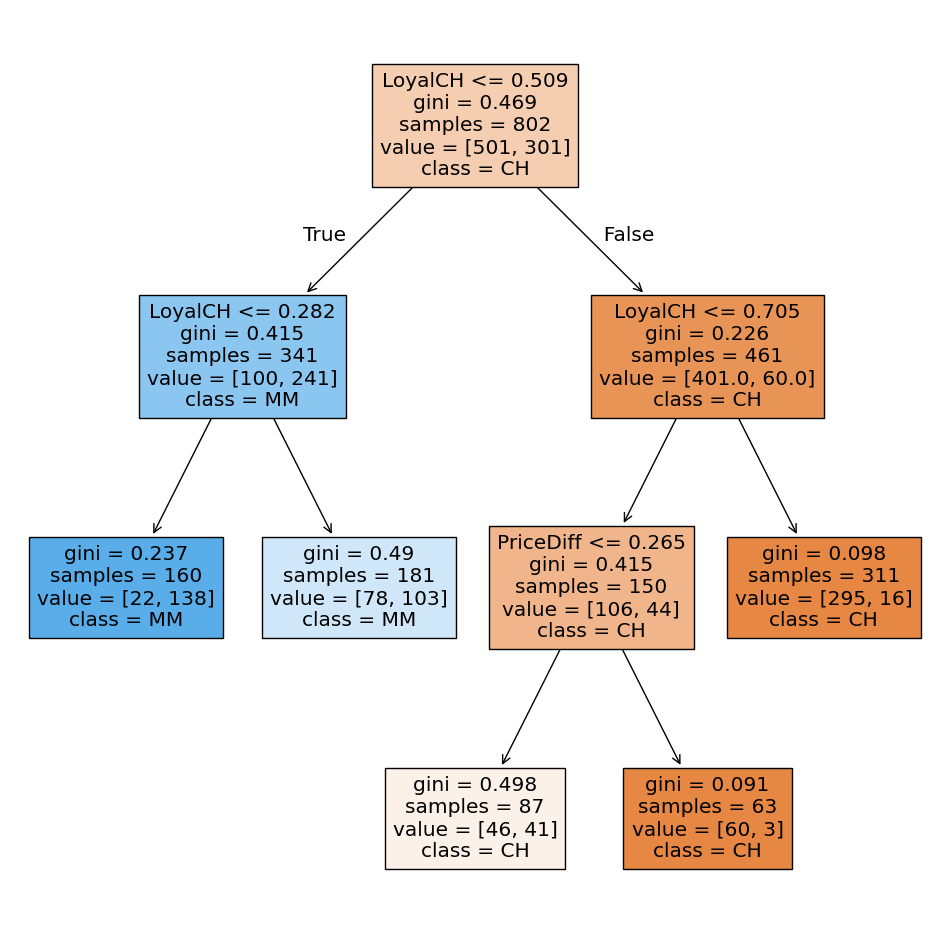

In [48]:
#If CV did not prune the tree then we create a tree with 5 terminal nodes
if pruned_tree.get_n_leaves() > 5:
    for alpha in ccp_path.ccp_alphas:
        tree = DTC(random_state=0, ccp_alpha=alpha)
        tree.fit(X_train, y_train)
        if tree.get_n_leaves() <= 5:
            pruned_tree = tree
            break
pruned_tree.get_depth(), pruned_tree.get_n_leaves()
ax= subplots(figsize=(12,12))[1]
plot_tree(pruned_tree, feature_names=feature_names, class_names=pruned_tree.classes_, filled=True)

##### ***(j)*** Compare the training error rates between the pruned and unpruned trees. Which one is higher?

In [49]:
# Unpruned Tree 
unpruned= DTC(random_state=0, ccp_alpha=0.0)
unpruned.fit(X_train, y_train)
#training error
train_pred= unpruned.predict(X_train)
train_error= 1 - accuracy_score(y_train, train_pred)
train_error

0.00872817955112215

In [50]:
#pruned train error
train_pred_pruned= pruned_tree.predict(X_train)
train_error_pruned = 1 - accuracy_score(y_train, train_pred_pruned)
train_error_pruned

0.19950124688279303

##### ***(k)*** Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [51]:
#unpruned test error
y_pred_unpruned = unpruned.predict(X_test)
test_error_unpruned= 1 - accuracy_score(y_test, y_pred_unpruned)
test_error_unpruned

0.26865671641791045

In [52]:
#pruned test error
y_pred_pruned = pruned_tree.predict(X_test)
test_error_pruned= 1 - accuracy_score(y_test, y_pred_pruned)
test_error_pruned

0.20895522388059706

#### Conclusions
##### The Pruned tree has higher training error(since it sacrifices fit for simplicity and better generalization) than unpruned tree.
##### The unpruned tree usually has lower training error but higher test error(Overfitting).

#### Question 2.

##### We now use boosting to predict ***Salary*** in the ***Hitters*** data set.
##### ***(a)*** Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [53]:
Hitters = load_data("Hitters")
Hitters.Salary.isna().sum()

59

In [54]:
hitters_dropna= Hitters["Salary"].dropna()
Hitters["log_salary"] = np.log(hitters_dropna)
Hitters["log_salary"]

0           NaN
1      6.163315
2      6.173786
3      6.214608
4      4.516339
         ...   
317    6.551080
318    6.774224
319    5.953243
320    6.866933
321    6.907755
Name: log_salary, Length: 322, dtype: float64

##### ***(b)*** Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [55]:
Hitters.shape

(322, 21)

In [56]:
train_data = Hitters.sample(n=200, random_state=0)
test_data = Hitters.drop(train_data.index)
train_data = train_data.dropna(subset=["log_salary"])
test_data = test_data.dropna(subset=["log_salary"])
X_train = train_data.drop(columns=["Salary", "log_salary"], errors="ignore", axis=1)
y_train= train_data["log_salary"]
X_test = test_data.drop(columns=["Salary", "log_salary"], errors="ignore", axis=1)
y_test = test_data["log_salary"]

##### ***(c)*** Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter (λ). Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.


Text(0.5, 1.0, 'Boosting Training MSE vs Shrinkage')

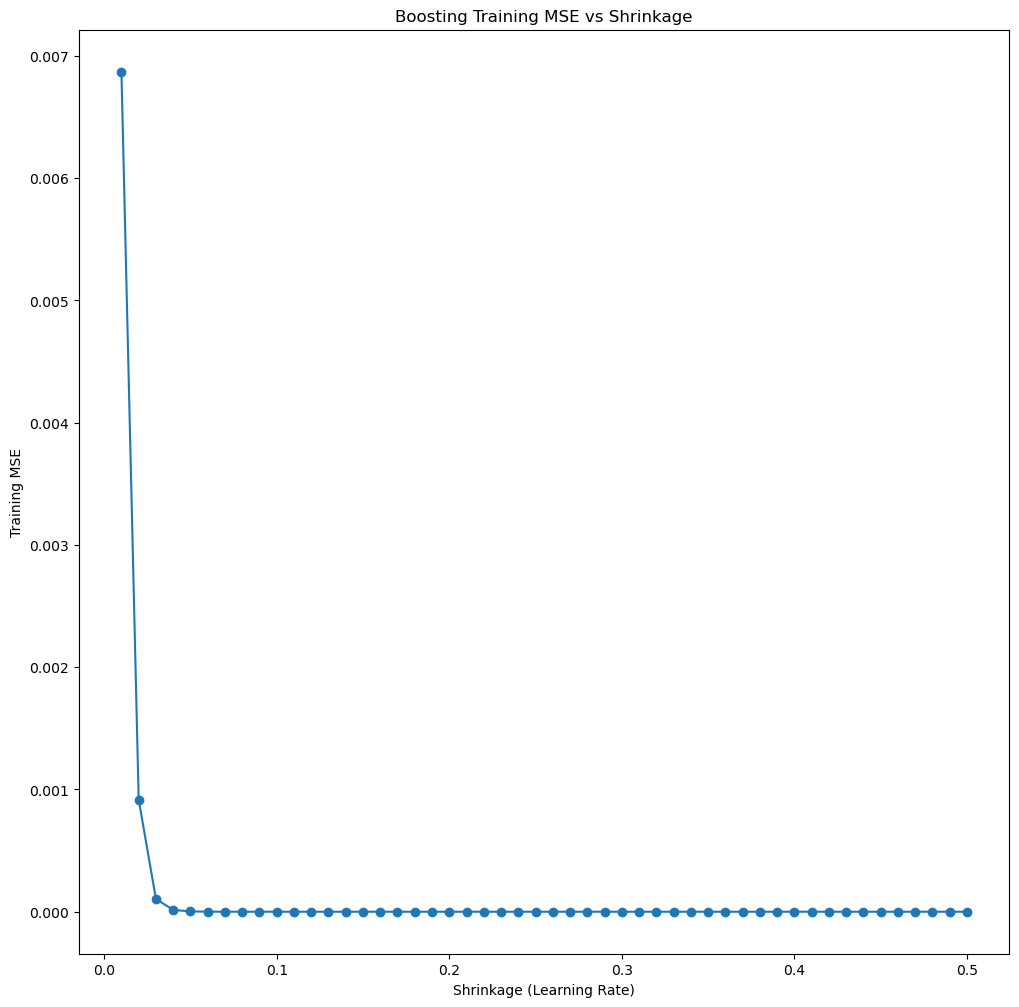

In [57]:
from sklearn.metrics import mean_squared_error
#drop missing values
X_train = X_train.dropna()
X_test = X_test.dropna()
#align y with X
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]
#one-hot encode the categorical predictors
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

#Make sure both train and test have the same columns
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

shrink_params = np.linspace(0.01,0.5, 50)
train_mse= []
#Loop over shrinkage values
for shrink in shrink_params:
    boost_hitters = GBR(n_estimators=1000, learning_rate=shrink, random_state=0)
    boost_hitters.fit(X_train_enc, y_train)
    y_train_pred = boost_hitters.predict(X_train_enc)
    mse= mean_squared_error(y_train, y_train_pred)
    train_mse.append(mse)
#Lets plot
fig, ax = subplots(figsize=(12,12))
ax.plot(shrink_params, train_mse, marker="o")
ax.set_xlabel("Shrinkage (Learning Rate)")
ax.set_ylabel("Training MSE")
ax.set_title("Boosting Training MSE vs Shrinkage")
    


##### ***(d)*** Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

    

Text(0.5, 1.0, 'Boosting Test MSE vs Shrinkage')

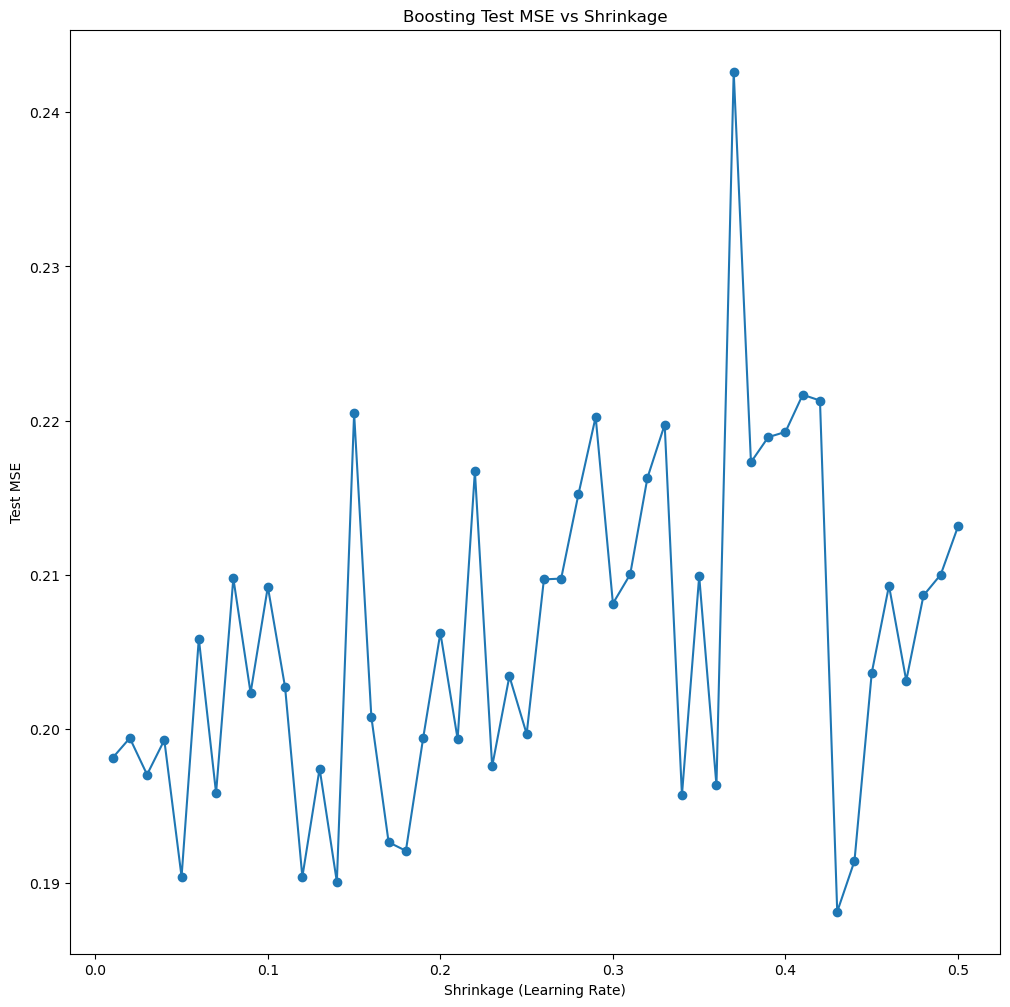

In [58]:
test_mse= []
for shrink in shrink_params:
    boost_hitters = GBR(n_estimators=1000, learning_rate=shrink, random_state=0)
    boost_hitters.fit(X_train_enc, y_train)
    y_test_pred = boost_hitters.predict(X_test_enc)
    mse= mean_squared_error(y_test, y_test_pred)
    test_mse.append(mse)
#Lets plot
fig, ax = subplots(figsize=(12,12))
ax.plot(shrink_params, test_mse, marker="o")
ax.set_xlabel("Shrinkage (Learning Rate)")
ax.set_ylabel("Test MSE")
ax.set_title("Boosting Test MSE vs Shrinkage")

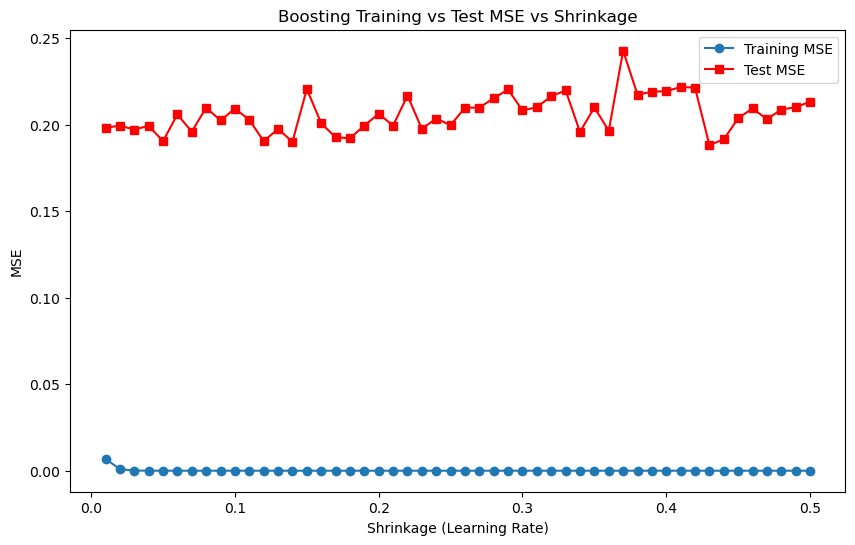

In [59]:
# Range of shrinkage values
shrink_params = np.linspace(0.01, 0.5, 50)
train_mse = []
test_mse = []

# Loop over shrinkage values
for shrink in shrink_params:
    boost_hitters = GBR(n_estimators=1000, learning_rate=shrink, random_state=0)
    boost_hitters.fit(X_train_enc, y_train)

    # Training MSE
    y_train_pred = boost_hitters.predict(X_train_enc)
    mse_train = mean_squared_error(y_train, y_train_pred)
    train_mse.append(mse_train)

    # Test MSE
    y_test_pred = boost_hitters.predict(X_test_enc)
    mse_test = mean_squared_error(y_test, y_test_pred)
    test_mse.append(mse_test)

# Plot both curves
fig, ax = subplots(figsize=(10, 6))
ax.plot(shrink_params, train_mse, marker="o", label="Training MSE")
ax.plot(shrink_params, test_mse, marker="s", label="Test MSE", color="red")
ax.set_xlabel("Shrinkage (Learning Rate)")
ax.set_ylabel("MSE")
ax.set_title("Boosting Training vs Test MSE vs Shrinkage")
ax.legend()


##### ***(e)*** Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in chapters 3(Linear Regression) and 6(Lasso and Ridge Regression).

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV

#Fit linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_enc, y_train)
#predict and compute MSE
y_test_pred_lin = lin_reg.predict(X_test_enc)
mse_lin = mean_squared_error(y_test, y_test_pred_lin)

#Ridge regression with CV
ridge_reg = RidgeCV(alphas=np.logspace(-2, 2, 100), cv=10)
ridge_reg.fit(X_train_enc, y_train)
y_test_pred_ridge = ridge_reg.predict(X_test_enc)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Lasso Regression with CV
lasso_reg = LassoCV(alphas=np.logspace(-2, 2, 100), cv=10, max_iter=10000)
lasso_reg.fit(X_train_enc, y_train)
y_test_pred_lasso = lasso_reg.predict(X_test_enc)
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

## Boosting - Take the best shrinkage value found earlier where MSE is lower and compute its MSE
best_boost_mse = test_mse[np.argmin(mse_test)]

#comparison of the Test MSEs
print(mse_lin, 
      mse_ridge, 
      mse_lasso, 
      best_boost_mse)
# Interpretation
#Boosting clearly outperforms linear, ridge and lasso regression : Boosting captures nonlinearities that linear methods miss


0.4127413553804856 0.4069171104024112 0.40630472916309995 0.19810492880437924


##### ***(f)*** Which variables appear to be the most important predictors in the boosted model?

In [61]:
best_idx = np.argmin(test_mse)
best_shrink = shrink_params[best_idx]
#Refit best boosting model
best_boost = GBR(n_estimators=1000, learning_rate= best_shrink, random_state=0)
best_boost.fit(X_train_enc, y_train)
#Get feature importances
importances = best_boost.feature_importances_
#Put into Dataframe for readability
feat_imp = pd.DataFrame({
    "Feature": X_train_enc.columns,
    "Importance": importances
    }).sort_values(by="Importance", ascending=False)
feat_imp.head(10) #top 10 predictors

,Feature,Importance
7,CAtBat,0.559493
8,CHits,0.171834
1,Hits,0.041692
5,Walks,0.040230
0,AtBat,0.038317
6,Years,0.030218
9,CHmRun,0.026243
13,PutOuts,0.017738
15,Errors,0.016223
11,CRBI,0.015865


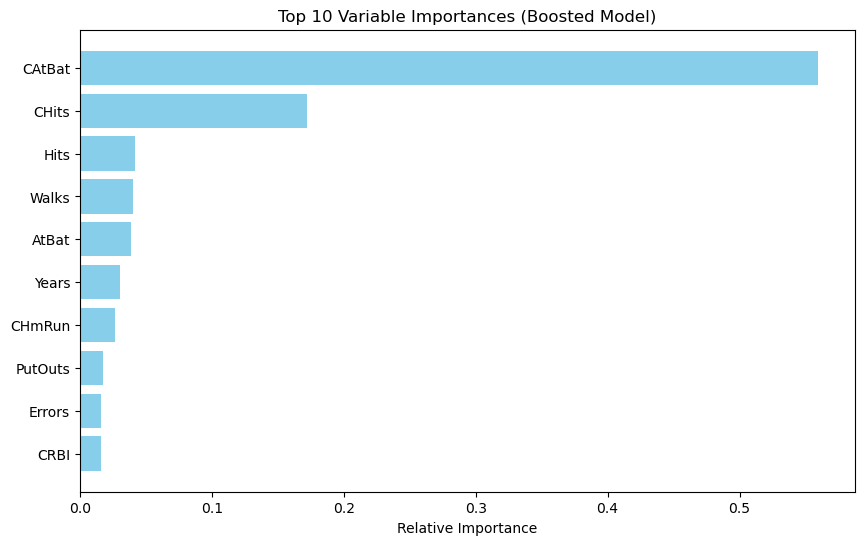

In [62]:
# We can extend by plotting top 10 variables that are important
import matplotlib.pyplot as plt

# Plot top 10
top_feat = feat_imp.head(10)
plt.figure(figsize=(10,6))
plt.barh(top_feat["Feature"], top_feat["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Relative Importance")
plt.title("Top 10 Variable Importances (Boosted Model)")
plt.show()


##### ***(g)*** Now apply bagging to the training set. What is the test set MSE for this approach?

In [63]:
bag_hitters = RF(max_features=X_train_enc.shape[1], random_state=0)
bag_hitters.fit(X_train_enc, y_train)
bag_hitters_pred = bag_hitters.predict(X_test_enc)
bag_mse= mean_squared_error(y_test, bag_hitters_pred)
bag_mse

0.18118188927391643

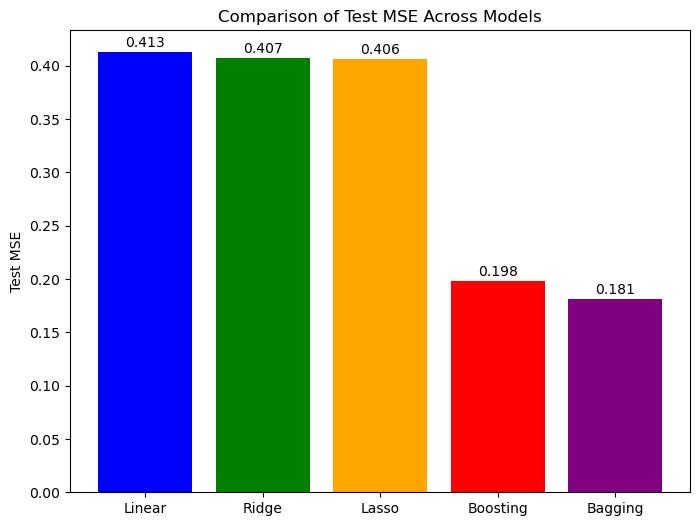

In [64]:
#Lets make a bar plot comparing the test MSEs of all five methods
import matplotlib.pyplot as plt

# Collect results
mse_results = {
    "Linear": mse_lin,
    "Ridge": mse_ridge,
    "Lasso": mse_lasso,
    "Boosting": best_boost_mse,
    "Bagging": bag_mse
}

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(mse_results.keys(), mse_results.values(), color=["blue","green","orange","red","purple"])
ax.set_ylabel("Test MSE")
ax.set_title("Comparison of Test MSE Across Models")

# Annotate values on top of bars
for i, v in enumerate(mse_results.values()):
    ax.text(i, v + 0.005, f"{v:.3f}", ha="center")

plt.show()


##### This question uses ***Caravan*** data set.

##### ***(a)*** Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

In [78]:
Caravan = load_data("Caravan")
train_data = Caravan.sample(n=1000, random_state=0)
test_data= Caravan.drop(train_data.index)
X_train = train_data.drop(columns="Purchase", axis=1)
X_test= test_data.drop(columns="Purchase", axis=1)
y_train = train_data["Purchase"]
y_test = test_data["Purchase"]

#One hot encode the categorical predictors and response
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)
y_train_enc = pd.get_dummies(y_train, drop_first=True)
y_test_enc = pd.get_dummies(y_test, drop_first=True)
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)


##### ***(b)*** Fit a boosting model to the training data set with ***Purchase*** as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

In [84]:
caravan_boost = GBC(n_estimators=1000, learning_rate=0.01, random_state=0)
caravan_boost.fit(X_train_enc, y_train_enc)
#impo_features =pd.Series(caravan_boost.feature_importances_, index=X_train_enc.columns)
#impo_features.sort_values(ascending=False).head(10)

importances = caravan_boost.feature_importances_
feat_impo = pd.DataFrame(
    {"Features":X_train_enc.columns,
    "Importance": importances}
).sort_values(by="Importance", ascending=False)
feat_impo.head(10)

C:\Users\colli\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Features,Importance
58,PBRAND,0.068322
21,MBERMIDD,0.062689
39,MINK7512,0.052955
22,MBERARBG,0.052336
46,PPERSAUT,0.051347
26,MSKB2,0.045151
16,MOPLMIDD,0.039602
6,MGODPR,0.037590
60,PPLEZIER,0.032038
56,PGEZONG,0.029203


##### ***(c)*** Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20%. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [94]:
#predict probabilities
y_test_prob = caravan_boost.predict_proba(X_test_enc)[:, 1]

#predict Yes if prob>0.2 - extract only the probabilities for the postive class
y_test_pred_boost = (y_test_prob>0.2).astype(int)

#confusion matrix
cm_boost=confusion_matrix(y_test_enc, y_test_pred_boost)

#Fraction of predicted purchases that are correct(precision)
precision_boost = cm_boost[1,1] / (cm_boost[0,1] + cm_boost[1,1])
precision_boost


0.13851351351351351

In [99]:
from sklearn.linear_model import LogisticRegression
#Logistic regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_enc, y_train_enc)
y_test_prob =log_reg.predict_proba(X_test_enc)[:, 1]
y_test_pred = (y_test_prob>0.2).astype(int)
cm_log = confusion_matrix(y_test_enc, y_test_pred)
precision_log = cm_log[1,1] / (cm_log[0,1] + cm_log[1,1])
precision_log
                        

C:\Users\colli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.14092140921409213

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_enc, y_train_enc)
y_test_pred_knn = knn.predict(X_test_enc)
cm_knn = confusion_matrix(y_test_enc, y_test_pred_knn)
precision_knn = cm_knn[1,1]/ (cm_knn[0,1] + cm_knn[1,1])
precision_knn

C:\Users\colli\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.22

In [104]:
#We already have precision: now lets comput recall and F1 score for Boosting, Logistic Regression and KNN
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#Boosting
precision_boost = precision_score(y_test_enc, y_test_pred_boost)
recall_boost = recall_score(y_test_enc, y_test_pred_boost)
f1_boost = f1_score(y_test_enc, y_test_pred_boost)

# Logistic regression
precision_log = precision_score(y_test_enc, y_test_pred)
recall_log = recall_score(y_test_enc, y_test_pred)
f1_log = f1_score(y_test_enc, y_test_pred)

#KNN
precision_knn = precision_score(y_test_enc, y_test_pred_knn)
recall_knn = recall_score(y_test_enc, y_test_pred_knn)
f1_knn = f1_score(y_test_enc, y_test_pred_knn)
print("Boosting   - Precision:", precision_boost, " Recall:", recall_boost, " F1:", f1_boost)
print("Logistic   - Precision:", precision_log, " Recall:", recall_log, " F1:", f1_log)
print("KNN        - Precision:", precision_knn, " Recall:", recall_knn, " F1:", f1_knn)

#Interpretation
#Logistic regression actually has the best recall and highest F1, so it’s the most useful model overall here.
#Boosting performs similarly, but recall is a bit weaker.
#KNN looks good on precision but fails badly on recall, so in practice it wouldn’t be very helpful (it predicts too few buyers).



Boosting   - Precision: 0.13851351351351351  Recall: 0.14590747330960854  F1: 0.14211438474870017
Logistic   - Precision: 0.14092140921409213  Recall: 0.18505338078291814  F1: 0.16
KNN        - Precision: 0.22  Recall: 0.03914590747330961  F1: 0.06646525679758308


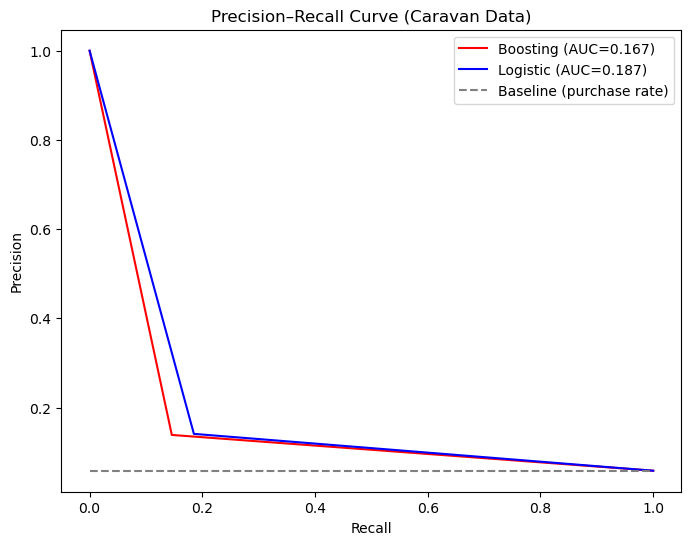

In [105]:
from sklearn.metrics import precision_recall_curve, auc
# #Lets build the precision-recall curve for both Logistic Regression and Boosting. This will show how changing the probability threshold affects precision vs recall
# Boosting
prec_boost, rec_boost, thr_boost = precision_recall_curve(y_test_enc, y_test_pred_boost)
auc_boost = auc(rec_boost, prec_boost)

# Logistic Regression
prec_log, rec_log, thr_log = precision_recall_curve(y_test_enc, y_test_pred)
auc_log = auc(rec_log, prec_log)

#plotting
plt.figure(figsize=(8,6))
plt.plot(rec_boost, prec_boost, label=f"Boosting (AUC={auc_boost:.3f})", color="red")
plt.plot(rec_log, prec_log, label=f"Logistic (AUC={auc_log:.3f})", color="blue")

# Baseline: precision = base purchase rate 
baseline = (y_test_enc.sum() / len(y_test_enc))
plt.hlines(baseline, 0, 1, colors="gray", linestyles="--", label="Baseline (purchase rate)")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Caravan Data)")
plt.legend()
plt.show()

In [107]:
#Lets calculate the optimal probability threshold for both Logistic Regression and Boosting based on the F1 score(harmonic mean of precision and recall)

#Function to find best threshold by F1
def find_best_threshold(y_true, y_prob):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)  # avoid /0
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx], precisions[best_idx], recalls[best_idx], f1_scores[best_idx]

# --- Boosting ---
best_thr_boost, best_prec_boost, best_rec_boost, best_f1_boost = find_best_threshold(y_test_enc, y_test_pred_boost)

# --- Logistic Regression ---
best_thr_log, best_prec_log, best_rec_log, best_f1_log = find_best_threshold(y_test_enc, y_test_pred)

print("Boosting:")
print(f" Best threshold: {best_thr_boost:.3f}")
print(f" Precision: {best_prec_boost:.3f}, Recall: {best_rec_boost:.3f}, F1: {best_f1_boost:.3f}")

print("\nLogistic Regression:")
print(f" Best threshold: {best_thr_log:.3f}")
print(f" Precision: {best_prec_log:.3f}, Recall: {best_rec_log:.3f}, F1: {best_f1_log:.3f}")


Boosting:
 Best threshold: 1.000
 Precision: 0.139, Recall: 0.146, F1: 0.142

Logistic Regression:
 Best threshold: 1.000
 Precision: 0.141, Recall: 0.185, F1: 0.160


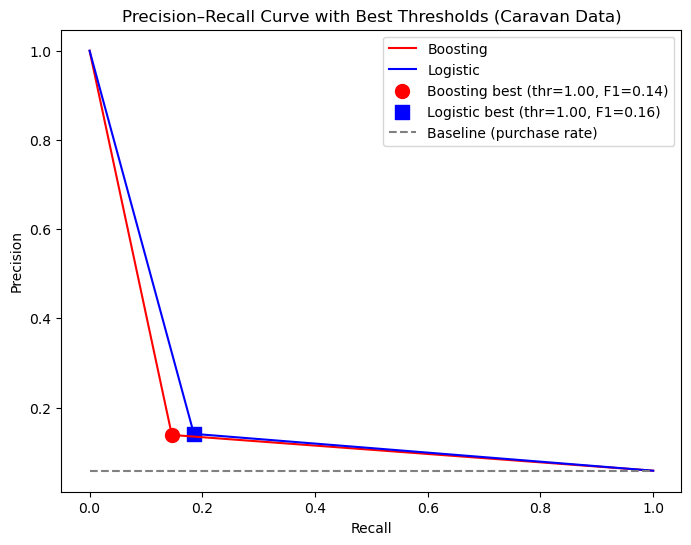

In [108]:
#Lets add the best f1 threshold points for both Boosting and Logistic Regression directly onto the precision-recall curve

#plot Precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(rec_boost, prec_boost, label="Boosting", color="red")
plt.plot(rec_log, prec_log, label="Logistic", color="blue")

#Add best points
plt.scatter(best_rec_boost, best_prec_boost, color="red", marker="o", s=100, label=f"Boosting best (thr={best_thr_boost:.2f}, F1={best_f1_boost:.2f})")
plt.scatter(best_rec_log, best_prec_log, color="blue", marker="s", s=100, label=f"Logistic best (thr={best_thr_log:.2f}, F1={best_f1_log:.2f})")

# Baseline
baseline = y_test_enc.sum() / len(y_test_enc)
plt.hlines(baseline, 0, 1, colors="gray", linestyles="--", label="Baseline (purchase rate)")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve with Best Thresholds (Caravan Data)")
plt.legend()
plt.show()